# Importing Libraries

In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = read_csv('dataset.csv')
print(df)

           V1        V2       V3       V4  Class
0     3.62160   8.66610  -2.8073 -0.44699      1
1     4.54590   8.16740  -2.4586 -1.46210      1
2     3.86600  -2.63830   1.9242  0.10645      1
3     3.45660   9.52280  -4.0112 -3.59440      1
4     0.32924  -4.45520   4.5718 -0.98880      1
...       ...       ...      ...      ...    ...
1367  0.40614   1.34920  -1.4501 -0.55949      2
1368 -1.38870  -4.87730   6.4774  0.34179      2
1369 -3.75030 -13.45860  17.5932 -2.77710      2
1370 -3.56370  -8.38270  12.3930 -1.28230      2
1371 -2.54190  -0.65804   2.6842  1.19520      2

[1372 rows x 5 columns]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
 2   V3      1372 non-null   float64
 3   V4      1372 non-null   float64
 4   Class   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
df.value_counts()

V1       V2         V3       V4        Class
 0.5195  -3.26330    3.0895  -0.98490  1        4
 0.5706  -0.02480    1.2421  -0.56210  1        4
 0.3798   0.70980    0.7572  -0.44440  1        4
 0.3292  -4.45520    4.5718  -0.98880  1        4
-1.3000   10.26780  -2.9530  -5.86380  1        3
                                               ..
-1.0802   2.19960   -2.5862  -1.27590  2        1
-1.0833  -0.31247    1.2815   0.41291  2        1
-1.0941   2.30720   -2.5237  -1.44530  2        1
-1.1005  -7.25080    6.0139   0.36895  2        1
 6.8248   5.21870   -2.5425   0.54610  1        1
Length: 1348, dtype: int64

In [5]:
print(df.dtypes)
print(df.describe())

V1       float64
V2       float64
V3       float64
V4       float64
Class      int64
dtype: object
                V1           V2           V3           V4        Class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     1.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     1.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     1.000000
50%       0.496180     2.319650     0.616630    -0.586650     1.000000
75%       2.821475     6.814625     3.179250     0.394810     2.000000
max       6.824800    12.951600    17.927400     2.449500     2.000000


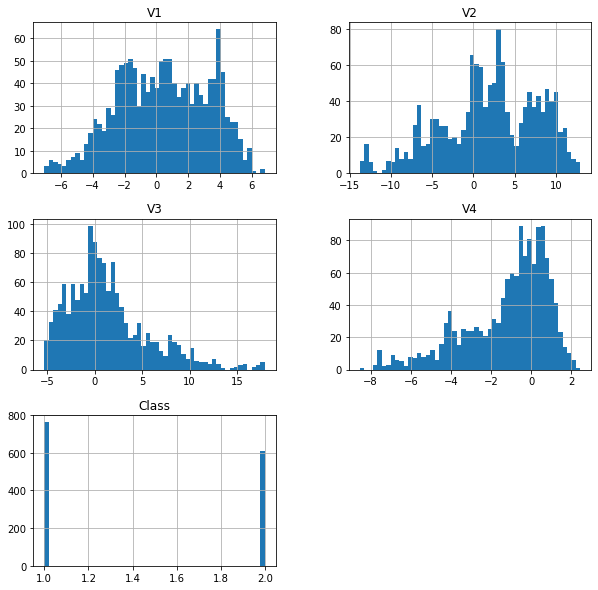

In [6]:
%matplotlib inline
df.hist(bins=50,figsize=(10,10))
plt.show()

             V1        V2        V3        V4     Class
V1     1.000000  0.264026 -0.380850  0.276817 -0.724843
V2     0.264026  1.000000 -0.786895 -0.526321 -0.444688
V3    -0.380850 -0.786895  1.000000  0.318841  0.155883
V4     0.276817 -0.526321  0.318841  1.000000 -0.023424
Class -0.724843 -0.444688  0.155883 -0.023424  1.000000


<AxesSubplot:>

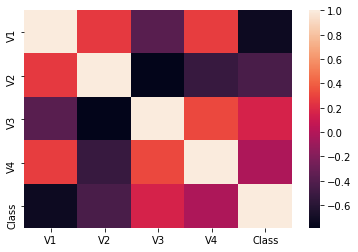

In [7]:
print(df.corr())
sns.heatmap(df.corr())

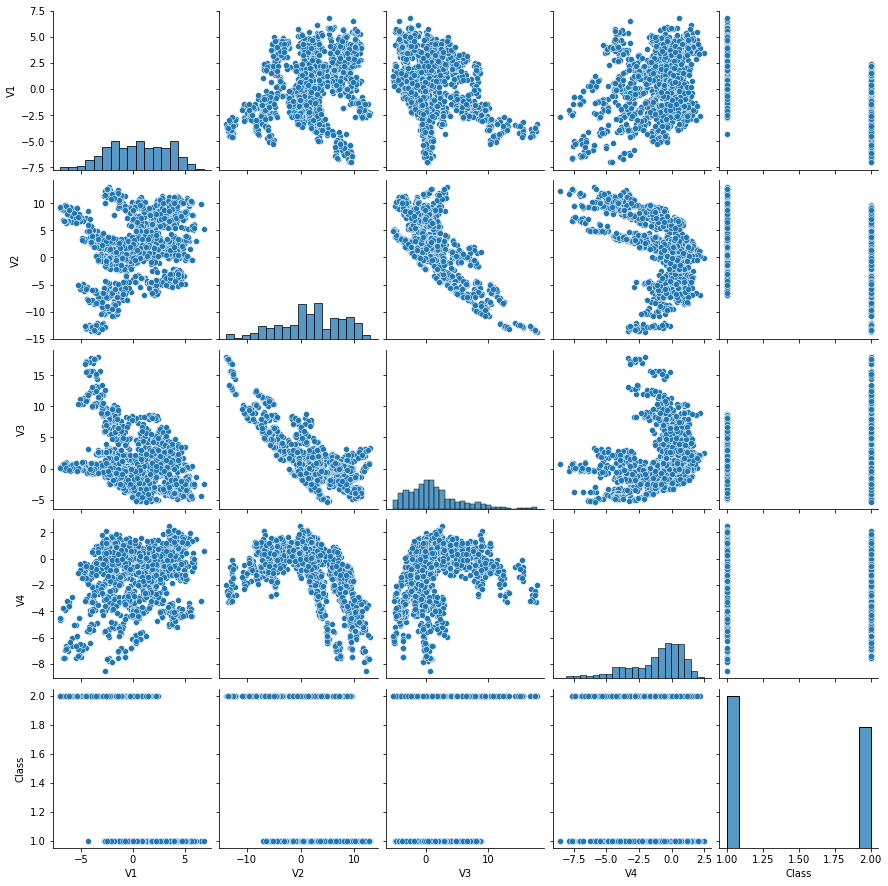

In [8]:
sns.pairplot(df)

<AxesSubplot:ylabel='Count'>

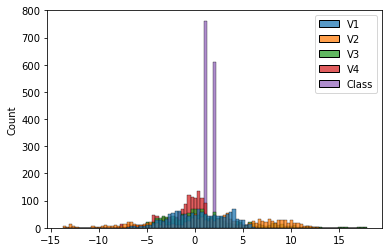

In [9]:
sns.histplot(data=df)

In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X)
print(y)

[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]
[1 1 1 ... 2 2 2]


# K Means Classification

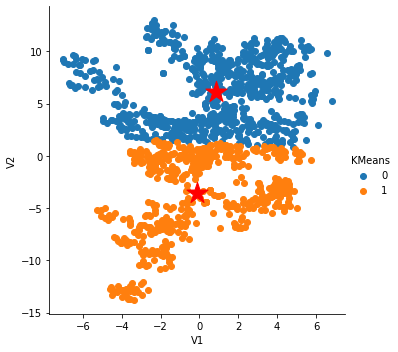

In [11]:
from sklearn.datasets import (make_blobs,make_circles,make_moons)
from sklearn.cluster import KMeans, SpectralClustering
import numpy as np

data = np.column_stack(( df.V1, df.V2))  # we use only V1 and V2

# compute K-Means
km_res = KMeans(n_clusters = 2).fit(data)
clusters = km_res.cluster_centers_

# put the assigned labels to the original dataset
df['KMeans'] = km_res.labels_

#plot out the result
g = sns.FacetGrid(data = df, hue = 'KMeans', height = 5)
g.map(plt.scatter, 'V1', 'V2')
g.add_legend();
plt.scatter(clusters[:,0], clusters[:,1], s=500, marker='*', c='r')

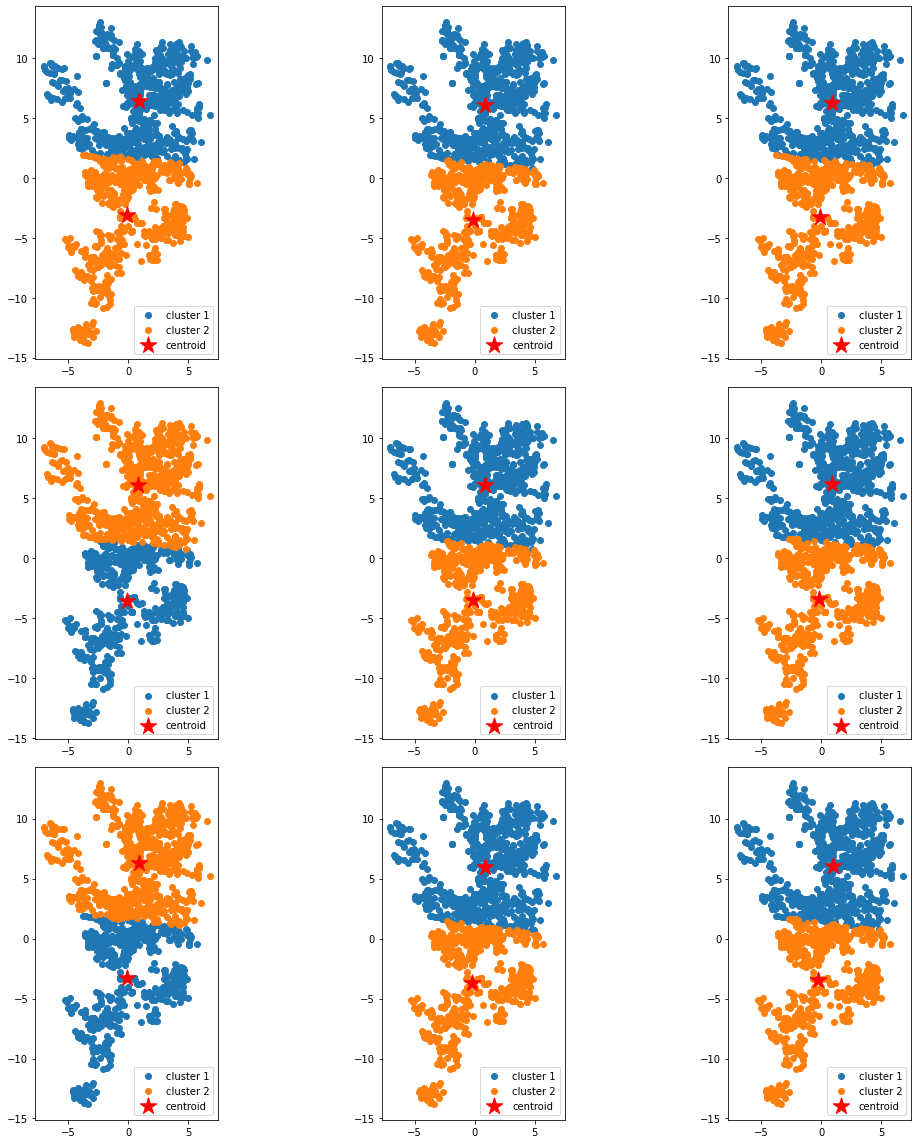

In [12]:
from sklearn.datasets import (make_blobs,make_circles,make_moons)
from sklearn.cluster import KMeans, SpectralClustering

n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    # Run local implementation of kmeans
    km = KMeans(n_clusters=2,
                max_iter=3)
    km.fit(data)
    centroids = km.cluster_centers_
    centers.append(centroids)
    ax[i].scatter(data[km.labels_ == 0, 0], data[km.labels_ == 0, 1],
                   label='cluster 1')
    ax[i].scatter(data[km.labels_ == 1, 0], data[km.labels_ == 1, 1],
                   label='cluster 2')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
    ax[i].legend(loc='lower right')
    ax[i].set_aspect('equal')
plt.tight_layout();

In [13]:
df.groupby('KMeans').describe()

V1                                                            \
        count      mean       std     min       25%       50%       75%   
KMeans                                                                    
0       782.0  0.866225  2.910112 -7.0421 -0.964008  1.110800  3.204625   
1       590.0 -0.139497  2.646464 -5.2943 -2.205700 -0.658875  1.993125   

                   V2            ...        V4          Class            \
           max  count      mean  ...       75%     max  count      mean   
KMeans                           ...                                      
0       6.8248  782.0  6.052920  ... -0.367145  2.1547  782.0  1.318414   
1       5.7403  590.0 -3.552398  ...  0.751055  2.4495  590.0  1.611864   

                                           
             std  min  25%  50%  75%  max  
KMeans                                     
0       0.466159  1.0  1.0  1.0  2.0  2.0  
1       0.487739  1.0  1.0  2.0  2.0  2.0  

[2 rows x 40 columns]

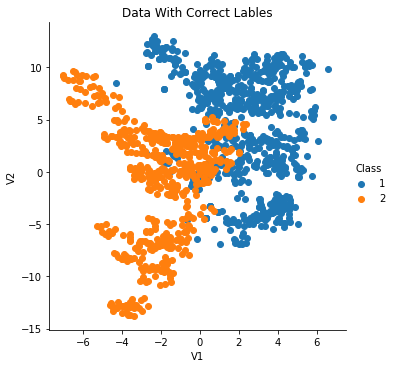

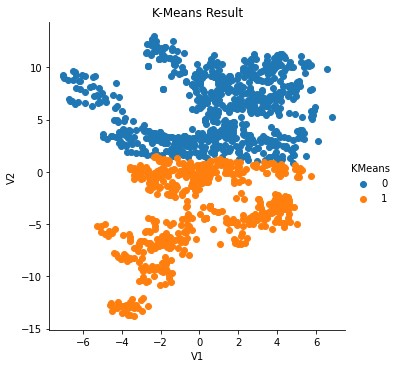

In [14]:
# plot the data with Correct labels
g = sns.FacetGrid(data = df, hue = 'Class', height = 5)
g.map(plt.scatter, 'V1', 'V2')
g.add_legend()
plt.title("Data With Correct Lables")


# plot the data computed by K-Means
g = sns.FacetGrid(data = df, hue = 'KMeans', height = 5)
g.map(plt.scatter, 'V1', 'V2')
g.add_legend()
plt.title("K-Means Result");

In [15]:
# correct the labels
df["KMeans"] = df["KMeans"].map({0: 1, 1: 2})

# calculate the accuracy of the model.
correct = 0

for i in range(0,1372):
    if df.Class[i] == df["KMeans"][i]:
        correct+=1
print("Accuracy for K Means Classification:")
Accuracy_Kmeans = (correct/1371)*100
print(Accuracy_Kmeans)

Accuracy for K Means Classification:
65.20787746170679


In [16]:
#Data Split and making ready to classify the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# SVC 

In [17]:
from sklearn.svm import SVC as svc

svc_object = svc(kernel='poly', degree=8) 

svc_object.fit(X_train, y_train)

predicted_labels = svc_object.predict(X_test) 

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(classification_report(y_test, predicted_labels)) 

print(confusion_matrix(y_test, predicted_labels)) 
SVC_accuracy= accuracy_score(y_test, predicted_labels) *100
print(SVC_accuracy) 

              precision    recall  f1-score   support

           1       1.00      0.69      0.82       157
           2       0.71      1.00      0.83       118

    accuracy                           0.82       275
   macro avg       0.85      0.84      0.82       275
weighted avg       0.87      0.82      0.82       275

[[108  49]
 [  0 118]]
82.18181818181817


# Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(max_depth=2, random_state=0)  
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [20]:
confusionMatrix = confusion_matrix(y_test, y_pred)
accuracyScore = accuracy_score(y_test, y_pred)
classificationReport = classification_report(y_test, y_pred)
print("Confusion Matrix for SVC")
print(confusionMatrix)
print("Accuracy: ")
RandomForestaccuracy = accuracyScore*100;
print(RandomForestaccuracy)

print(classificationReport)

Confusion Matrix for SVC
[[150   7]
 [ 17 101]]
Accuracy: 
91.27272727272727
              precision    recall  f1-score   support

           1       0.90      0.96      0.93       157
           2       0.94      0.86      0.89       118

    accuracy                           0.91       275
   macro avg       0.92      0.91      0.91       275
weighted avg       0.91      0.91      0.91       275



In [21]:
print("Accuracy Comparison:")
print(" 1. K Means")
print(Accuracy_Kmeans)
print(" 2. SVC")
print(SVC_accuracy)
print(" 3. Random Forest")
print(RandomForestaccuracy)

Accuracy Comparison:
 1. K Means
65.20787746170679
 2. SVC
82.18181818181817
 3. Random Forest
91.27272727272727
